In [292]:
#imports
from PIL import Image
import numpy as np
from numpy import array
from os import path
import cv2
import matplotlib.pyplot as plt
from time import sleep

In [293]:
def load_png_to_array(fileName='./img.png'): # loads and returns png as a numpy array
    img = Image.open(fileName)
    img = img.convert('L') # convert to grayscale
    img = np.array(img)
    return img

In [294]:
def reduce_line_thickness(img, factor=2): # applies gaussian blur to img
    img = cv2.GaussianBlur(img, (3, 3), 0)
    # save image
    #cv2.imwrite('blurred.png', img)
    return img

In [295]:
def is_approximately_equal(a, b, epsilon=0.0001): # boolean, if a and b are approximately equal
    return abs(a - b) < epsilon

In [296]:
def fits_in_line(line=[[0, 0], [1, 1]], point=[0, 0]):
    '''
    (y3-y2)/(x3-x2) = (y2-y1)/(x2-x1)
    ->(y3-y2)*(x2-x1) = (y2-y1)*(x3-x2) avoids division by zero explosive values
    '''
    return is_approximately_equal((point[0] - line[-1][0])*(line[-1][1] - line[-2][1]) , (line[-1][0] - line[-2][0])*(point[1] - line[-1][1]))

In [297]:
def pts_to_lines(p): # converts a list of points to a list of lines, where each line is a list of points.   
    lines = [[p[0], p[1] if len(p)>1 else p[0]]]
    for i in range(2, len(p)-2):
        if fits_in_line(lines[-1], p[i]):
            lines[-1].append(p[i])
        else:
            lines.append([p[i-1],p[i]])
    for l in range(len(lines))[::-1]:
        if len(lines[l]) < 2:
            lines.pop(l)
    return lines

In [298]:
def get_centre_of_mass(pts): # gets com of a list of points
    x = 0
    y = 0
    for p in pts:
        x += p[0]
        y += p[1]
    return [int(x/len(pts)), int(y/len(pts))]

In [299]:
def get_polar_coordinates(pts, centre): # gets polar coordinates of a list of points, with respect to a centre=get_centre_of_mass(pts)
    polar_pts = []
    for p in pts:
        polar_pts.append([np.sqrt((p[0]-centre[0])**2 + (p[1]-centre[1])**2), np.arctan2(p[1]-centre[1], p[0]-centre[0])])
    return polar_pts
    # get_centre_of_mass(pts) can be called here as well, however this allows you to set a centre without editing this fx.

In [300]:
def sort_by_angle(pts): 

    plrcrds = get_polar_coordinates(pts, get_centre_of_mass(pts))
    combined = [[plrcrds[i], pts[i]] for i in range(len(pts))]
    combined = sorted(combined, key=lambda x: x[0][1])
    return [p[1] for p in combined]

In [301]:
def trace_line(img):
    ''' find all black pixels in image '''
    black_pixels = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] == 0:
                black_pixels.append((i,j))
    print('Found {} black pixels'.format(len(black_pixels)))
    print('Ratio to white',len(black_pixels)/(img.shape[0]*img.shape[1]))  
    print ('!Sorted by angle') 
    print (black_pixels)
    black_pixels = sort_by_angle(black_pixels)   
    print ('Sorted by angle') 
    print (black_pixels)
    lines = pts_to_lines(black_pixels)
    print('As lines')
    print(lines)
    return lines
    

In [302]:
def create_new_img(img, lines):
    new_img = np.zeros(img.shape)
    pts = np.where(img == 0)
    img[pts] = 255
    plt.plot(pts[1], pts[0], 'r.')
    return new_img

Found 85 black pixels
Ratio to white 0.000587121997043668
!Sorted by angle
[(76, 179), (76, 180), (76, 181), (76, 182), (76, 183), (76, 184), (76, 185), (76, 186), (76, 187), (76, 188), (76, 189), (76, 190), (76, 191), (76, 192), (76, 193), (76, 194), (78, 201), (78, 202), (78, 203), (84, 144), (89, 224), (154, 68), (155, 68), (156, 68), (157, 68), (158, 68), (159, 68), (160, 68), (161, 68), (162, 68), (163, 68), (164, 68), (165, 68), (166, 68), (167, 68), (168, 68), (172, 275), (173, 69), (173, 275), (174, 69), (174, 275), (175, 69), (175, 275), (176, 69), (176, 275), (177, 275), (178, 275), (179, 275), (180, 275), (181, 275), (182, 70), (182, 275), (183, 70), (183, 275), (184, 275), (185, 275), (189, 71), (190, 71), (194, 73), (197, 74), (198, 74), (199, 74), (200, 74), (201, 74), (205, 73), (206, 73), (210, 72), (211, 72), (229, 89), (229, 90), (229, 91), (229, 92), (229, 93), (229, 94), (229, 95), (229, 96), (229, 97), (229, 98), (231, 105), (248, 123), (292, 161), (293, 153), (293

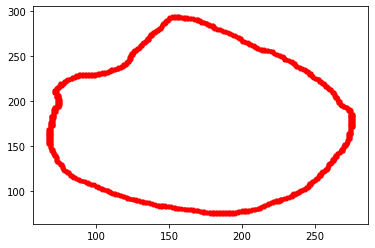

In [303]:
imgArr=load_png_to_array()
x = create_new_img(imgArr, trace_line(reduce_line_thickness(imgArr)))